In [306]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# 1. Data Ingestion
Loading the data using pandas function called `read_excel`

In [307]:
metadata = pd.read_excel("./Data/Election_Data.xlsx")
metadata

,**Data Dictionary**
0,NaN
1,1. vote: Party choice: Conservative or Labour
2,NaN
3,2. age: in years
4,NaN
5,3. economic.cond.national: Assessment of curre...
6,NaN
7,4. economic.cond.household: Assessment of curr...
8,NaN
9,"5. Blair: Assessment of the Labour leader, 1 t..."


| Column                      | Description |
|-----------------------------|-------------|
| vote                        | Party choice: Conservative or Labour |
| age                         | Age in years |
| economic.cond.national      | Assessment of current national economic conditions, 1 to 5 |
| economic.cond.household     | Assessment of current household economic conditions, 1 to 5 |
| Blair                       | Assessment of the Labour leader, 1 to 5 |
| Hague                       | Assessment of the Conservative leader, 1 to 5 |
| Europe                      | An 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment |
| political.knowledge         | Knowledge of parties' positions on European integration, 0 to 3 |
| gender                      | Female or male |


In [308]:
df = pd.read_excel("./Data/Election_Data.xlsx", sheet_name="Election_Dataset_Two Classes")

In [309]:
df

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...,...
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male


# 2. Data Preparation

- We'll check for null values and check for non-required columns.

## Structure of the data

In [310]:
df.shape # num Of rows and columns

(1525, 10)

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


- We can see `Unnamed: 0` is serial number column which is of no use. We'll remove that row
- And there are two columns which is of type object
- vote is our target value, we need to classify new data point to the classes given in vote

In [312]:
df["vote"].value_counts()

vote
Labour          1063
Conservative     462
Name: count, dtype: int64

## Missing values and removing unnecessary columns

In [313]:
df.drop(columns = "Unnamed: 0", axis = 1, inplace = True)

In [314]:
def data_quality_check(df):
    '''
        Function for checking the quality of the data, i.e., null values
    '''
    print("Number of null values")
    print(df.isnull().sum())
    
    

In [315]:
data_quality_check(df)

Number of null values
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64


## Summary Statistics of the data

In [316]:
df.describe()   # Summary statistics for numerical data

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [317]:
df.describe(include="object")  # get summary statistics for categorical variable

,vote,gender
count,1525,1525
unique,2,2
top,Labour,female
freq,1063,812


- There are no null values in any column, so we need not do any type of imputation. 

## Checking and handling duplicates

In [318]:
df[df.duplicated()]  # number of duplicate rows

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


# Exploratory Data Analysis

- Now we'll examine the pattern in the data.

## Univariate Data Analysis (Single Variable)

In [319]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


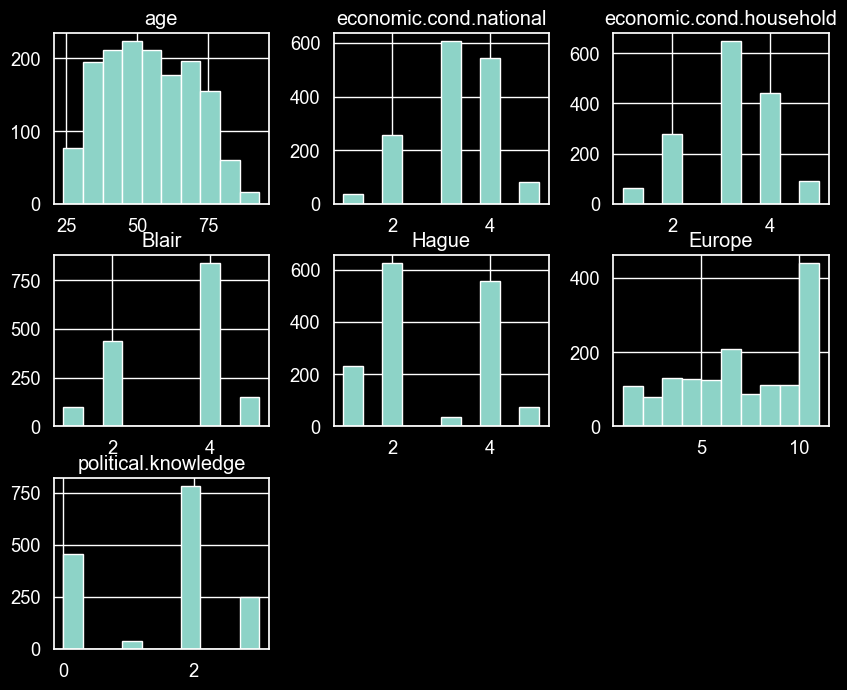

In [320]:
df.hist(figsize=(10, 8))  # Histogram for all numerical columns
plt.show()

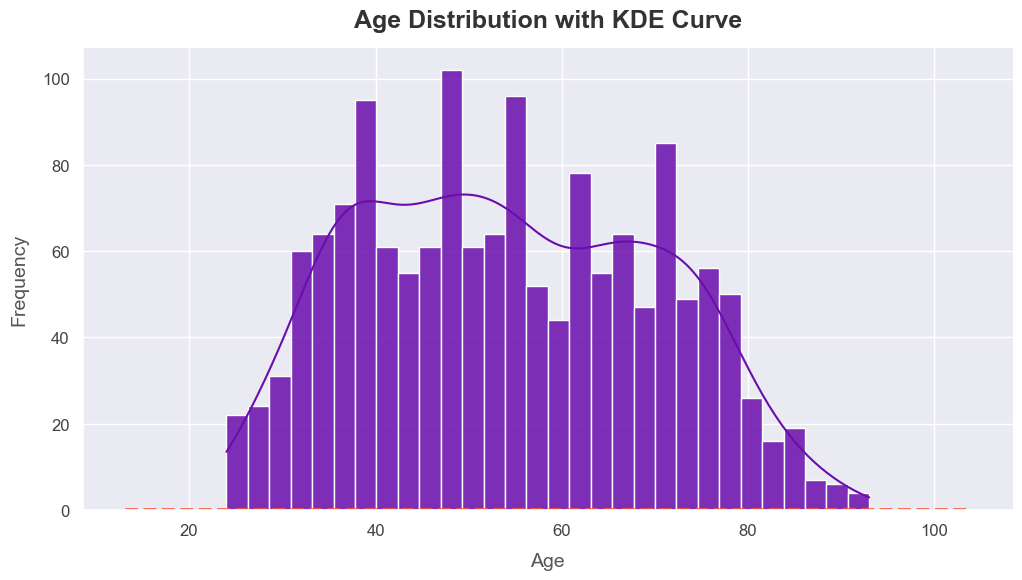

In [321]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")  
plt.figure(figsize=(12, 6))
bar_color = "#6A0DAD"  # A modern deep purple
line_color = "#FF5733"  # A vibrant orange for KDE

sns.histplot(df["age"], kde=True, bins=30, color=bar_color, edgecolor="white", alpha=0.85)
sns.kdeplot(df["age"], color=line_color, linewidth=2.5, linestyle="--")

plt.title("Age Distribution with KDE Curve", fontsize=18, fontweight="bold", pad=15, color="#333333")
plt.xlabel("Age", fontsize=14, fontweight="medium", labelpad=10, color="#555555")
plt.ylabel("Frequency", fontsize=14, fontweight="medium", labelpad=10, color="#555555")

sns.despine()

plt.xticks(fontsize=12, color="#444444")
plt.yticks(fontsize=12, color="#444444")

# Show the final plot
plt.show()


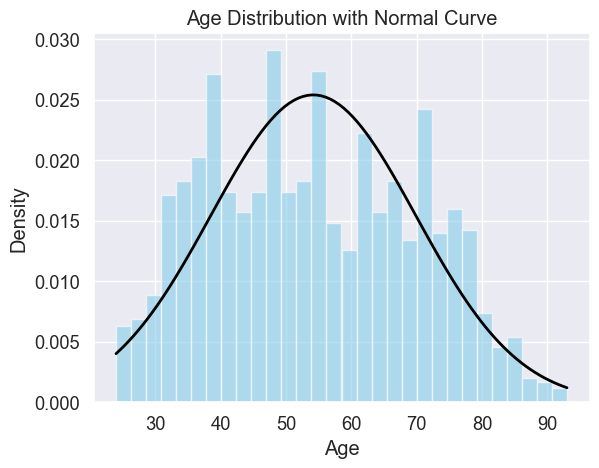

In [322]:
import scipy.stats as stats
mu, sigma = df['age'].mean(), df['age'].std()

# Generate values for normal distribution curve
x = np.linspace(df['age'].min(), df['age'].max(), 100)
y = stats.norm.pdf(x, mu, sigma)  # Normal Probability Density Function (PDF)

# Plot histogram
plt.hist(df['age'], bins=30, density=True, alpha=0.6, color='skyblue')

# Plot normal distribution curve
plt.plot(x, y, 'black', linewidth=2)

plt.title('Age Distribution with Normal Curve')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

- There's not that much deviation from the gaussian distribution of age variable. So we can infer that under some condition age variable is following gaussian distribution.

[<Axes: > <Axes: >]


Text(0.5, 1.0, 'Count of values in gender variable')

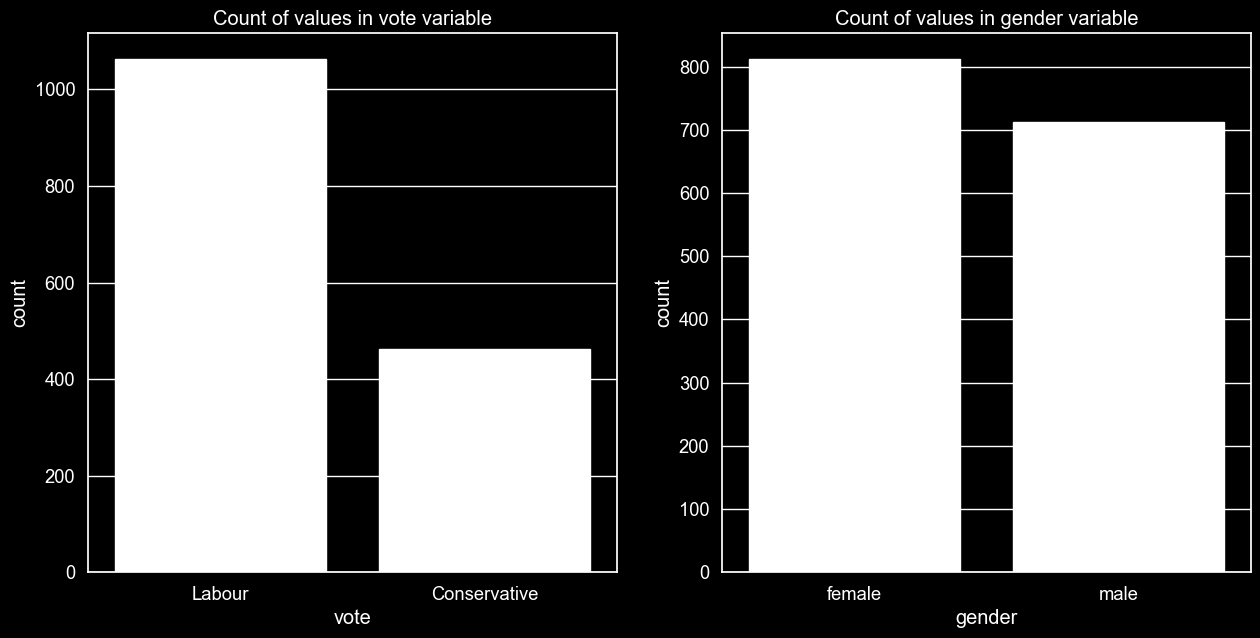

In [323]:
plt.style.use("dark_background")
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_figheight(7)
fig.set_figwidth(15)
print(axes)
sns.countplot(x=df['vote'], ax = axes[0], color="white").set_title(label = "Count of values in vote variable")
sns.countplot(x=df['gender'], ax = axes[1], color="white").set_title(label = "Count of values in gender variable")



- We can see there is imbalance of the data in vote variable. Let's see how much percent of each values is contributing

In [324]:
rows = df.shape[0]

round((df["vote"].value_counts() * 100) / rows, 2)

vote
Labour          69.7
Conservative    30.3
Name: count, dtype: float64

- So there are 70 % of the values are covered by Labour.

## Bivariate Data Analysis (Relationship between the variables)

### <p align="center">Numerical vs Numerical</p>

In [325]:
df.corr(numeric_only = True)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018567,-0.041587,0.030218,0.034626,0.068880,-0.048490
economic.cond.national,0.018567,1.000000,0.346303,0.326878,-0.199766,-0.209429,-0.023624
economic.cond.household,-0.041587,0.346303,1.000000,0.215273,-0.101956,-0.114885,-0.037810
Blair,0.030218,0.326878,0.215273,1.000000,-0.243210,-0.296162,-0.020917
Hague,0.034626,-0.199766,-0.101956,-0.243210,1.000000,0.287350,-0.030354
Europe,0.068880,-0.209429,-0.114885,-0.296162,0.287350,1.000000,-0.152364
political.knowledge,-0.048490,-0.023624,-0.037810,-0.020917,-0.030354,-0.152364,1.000000


- we can see that we are not able to understand through the values, so let's create heat map for the correlation of the variables

Text(0.5, 1.0, 'Correlation coefficient value of different columns')

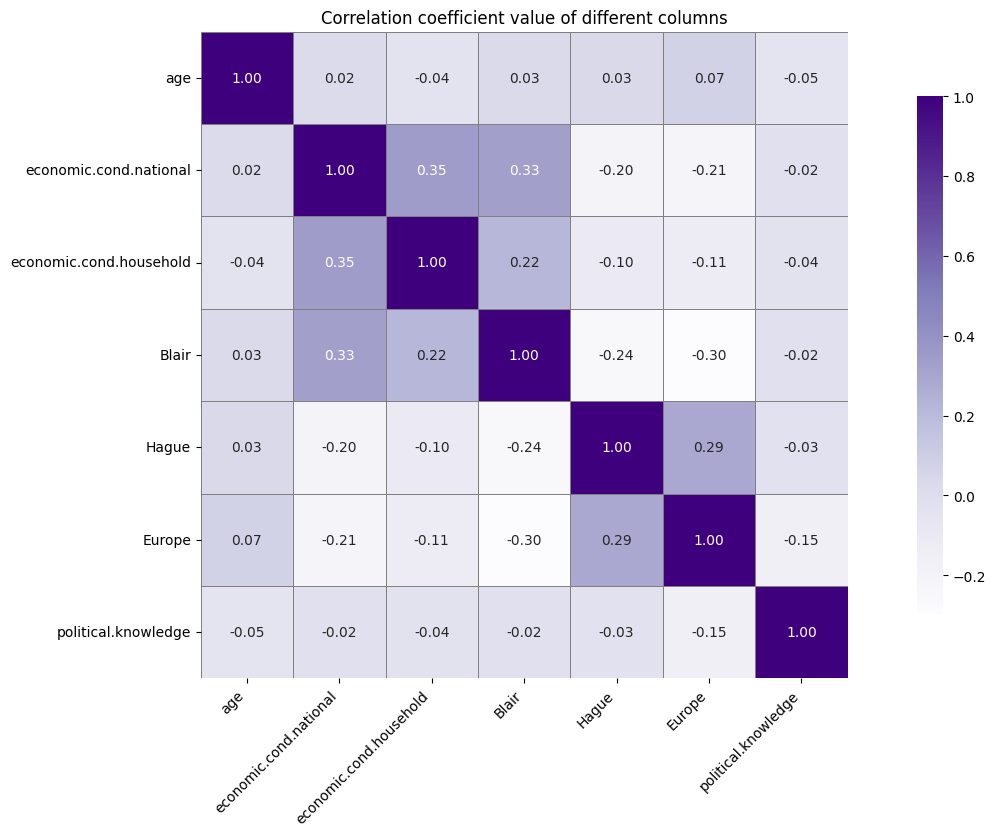

In [326]:
plt.style.use("default")
plt.figure(figsize = (14, 8))
corr_matrix = df.corr(numeric_only = True)
sns.heatmap(
    corr_matrix,
    annot=True,               
    cmap="Purples",           
    annot_kws={"size": 10},   
    fmt=".2f",                
    linewidths=0.5,           
    linecolor="gray",         
    cbar_kws={"shrink": 0.8}, 
    square=True
)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels
plt.tight_layout(pad = 0.2)
plt.title("Correlation coefficient value of different columns")
 


- We can see that there is correlation of $0.35$ between `economic.cond.household` and `economic.cond.national`. 

What should we do?
1. Is 0.35 Too High for Multicollinearity?
    - No, a correlation of 0.35 is not high enough to indicate serious multicollinearity.
    - Typically, multicollinearity becomes a problem if |r| > 0.7 between independent variables.

2. Does It Affect Model Performance?
    - If these correlated features provide unique information, they may still improve the model.
    - If they contain redundant information, one of them might be unnecessary.
    - **Action**: Run feature importance analysis (like SHAP or permutation importance) to check if both features contribute.

3. Shall we Drop One of the Features?
    - If we will use tree-based models (e.g., Decision Trees, Random Forest, XGBoost, etc.), they handle correlated features well, so we don’t need to drop anything.
    - If we will use linear models (e.g., Logistic Regression, SVM), mild correlation usually isn’t a big issue, but feature scaling & regularization (L1/L2) can help.
    - **Action**: If using Logistic Regression, check Variance Inflation Factor (VIF) to detect multicollinearity.
    - VIF > 5 or 10 → Feature is highly collinear and might need removal.

C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(

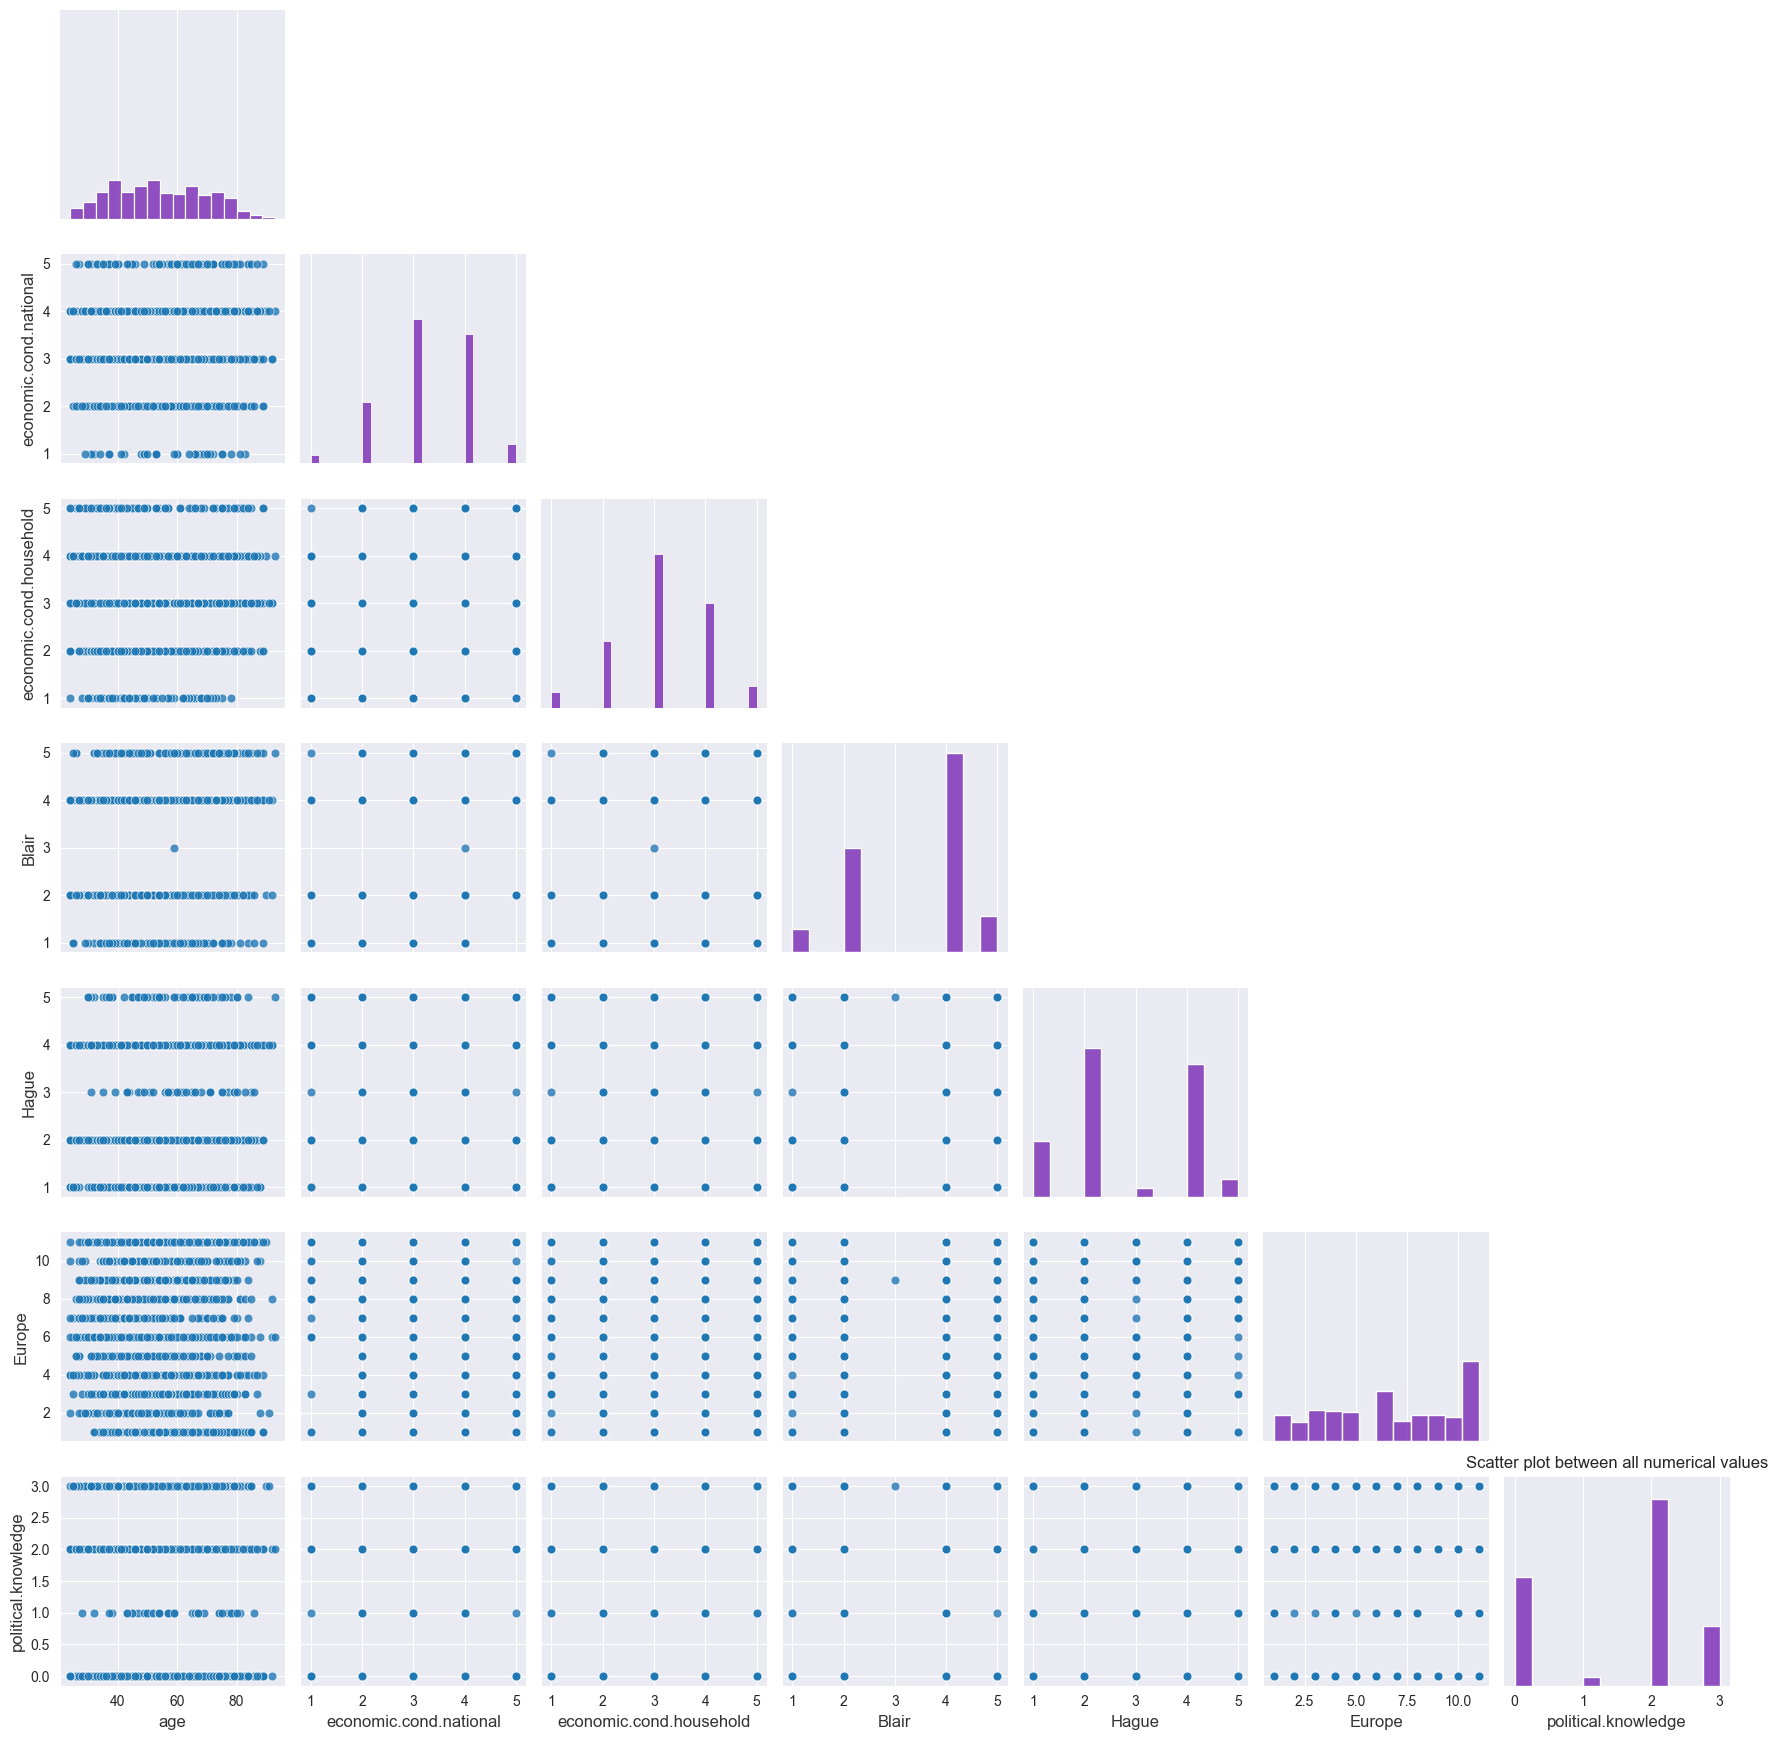

In [327]:
sns.set_style("darkgrid")  # Alternative: "whitegrid", "ticks"

custom_palette = "coolwarm"  # Other options: "viridis", "mako", "rocket"

# Create a pairplot with enhanced aesthetics
g = sns.pairplot(
    data=df,
    kind="scatter",
    palette=custom_palette,
    corner=True,  # Removes redundant upper triangle plots
    plot_kws={"s": 40, "edgecolor": "white", "alpha": 0.8},  # Customize scatter points
    diag_kws={"color": "#6A0DAD", "alpha": 0.7},  # Color for diagonal histograms
)

for ax in g.axes.flat:
    if ax:
        ax.set_xlabel(ax.get_xlabel(), fontsize=12, fontweight="medium", color="#333333")
        ax.set_ylabel(ax.get_ylabel(), fontsize=12, fontweight="medium", color="#333333")

plt.title("Scatter plot between all numerical values")
# Adjust spacing
plt.tight_layout()
plt.show()

### <p align="center">Categrical v/s Categorical</p>

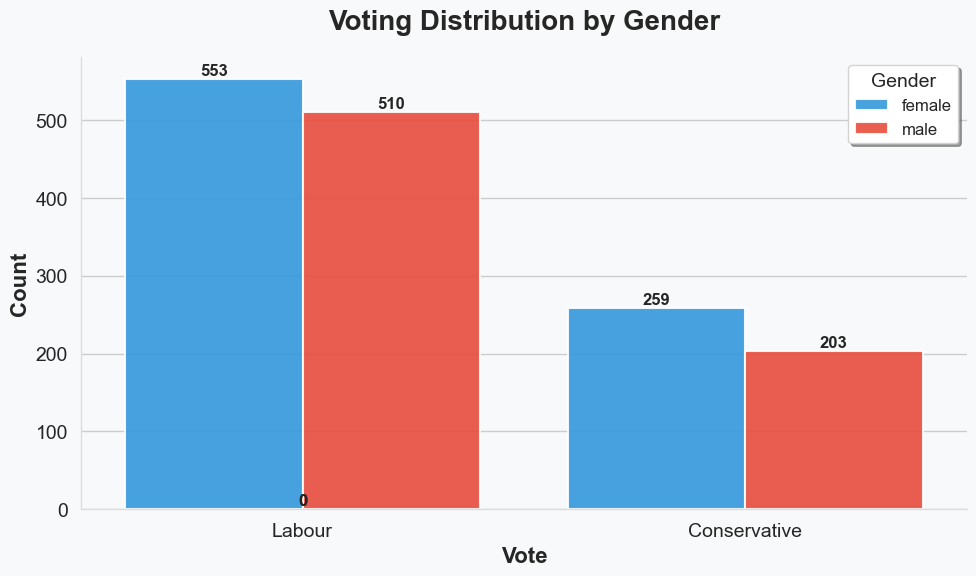

In [328]:
import matplotlib.patches as mpatches

# Set the style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Create a custom color palette - modern, appealing colors
custom_palette = ["#3498db", "#e74c3c"]  # Blue and Red

# Create the figure with a specific size for better proportions
plt.figure(figsize=(10, 6))

# Create the plot with custom settings
ax = sns.countplot(
    x='vote', 
    hue='gender', 
    data=df,
    palette=custom_palette,
    alpha=0.9,
    edgecolor='white',
    linewidth=1.5,
    saturation=1.0
)

sns.despine()

plt.title('Voting Distribution by Gender', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Vote', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16, fontweight='bold')

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2.,
        height + 5,
        f'{int(height)}',
        ha="center",
        fontsize=12,
        fontweight='bold'
    )

# Customize legend
plt.legend(
    title='Gender',
    fontsize=12,
    title_fontsize=14,
    frameon=True,
    facecolor='white',
    edgecolor='lightgray',
    shadow=True,
    loc='upper right'
)

# Add a subtle background color
ax.set_facecolor('#f8f9fa')
plt.gcf().set_facecolor('#f8f9fa')

# Add a border around the plot
for spine in ax.spines.values():
    spine.set_edgecolor('#ddd')
    spine.set_linewidth(1)

# Improve the tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adjust layout to fit everything nicely
plt.tight_layout()

# Show the plot
plt.show()

### <p align="center">Categorical v/s Numerical</p>

In [329]:
# Extract all numerical values
numerical_cols = []

for cols in df.columns:
    if df[cols].dtype != "object":
        numerical_cols.append(cols)
        
print(numerical_cols)

['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


C:\Users\SHOYEB ANSARI\AppData\Local\Temp\ipykernel_13072\2101094440.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\SHOYEB ANSARI\AppData\Local\Temp\ipykernel_13072\2101094440.py:12: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.boxplot(
C:\Users\SHOYEB ANSARI\AppData\Local\Temp\ipykernel_13072\2101094440.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\SHOYEB ANSARI\AppData\Local\Temp\ipykernel_13072\2101094440.py:12: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.boxplot(
C:\Users\SHOYEB ANSARI\AppData\Local\Temp\ipykernel_13072\2101094440.py:12: Future

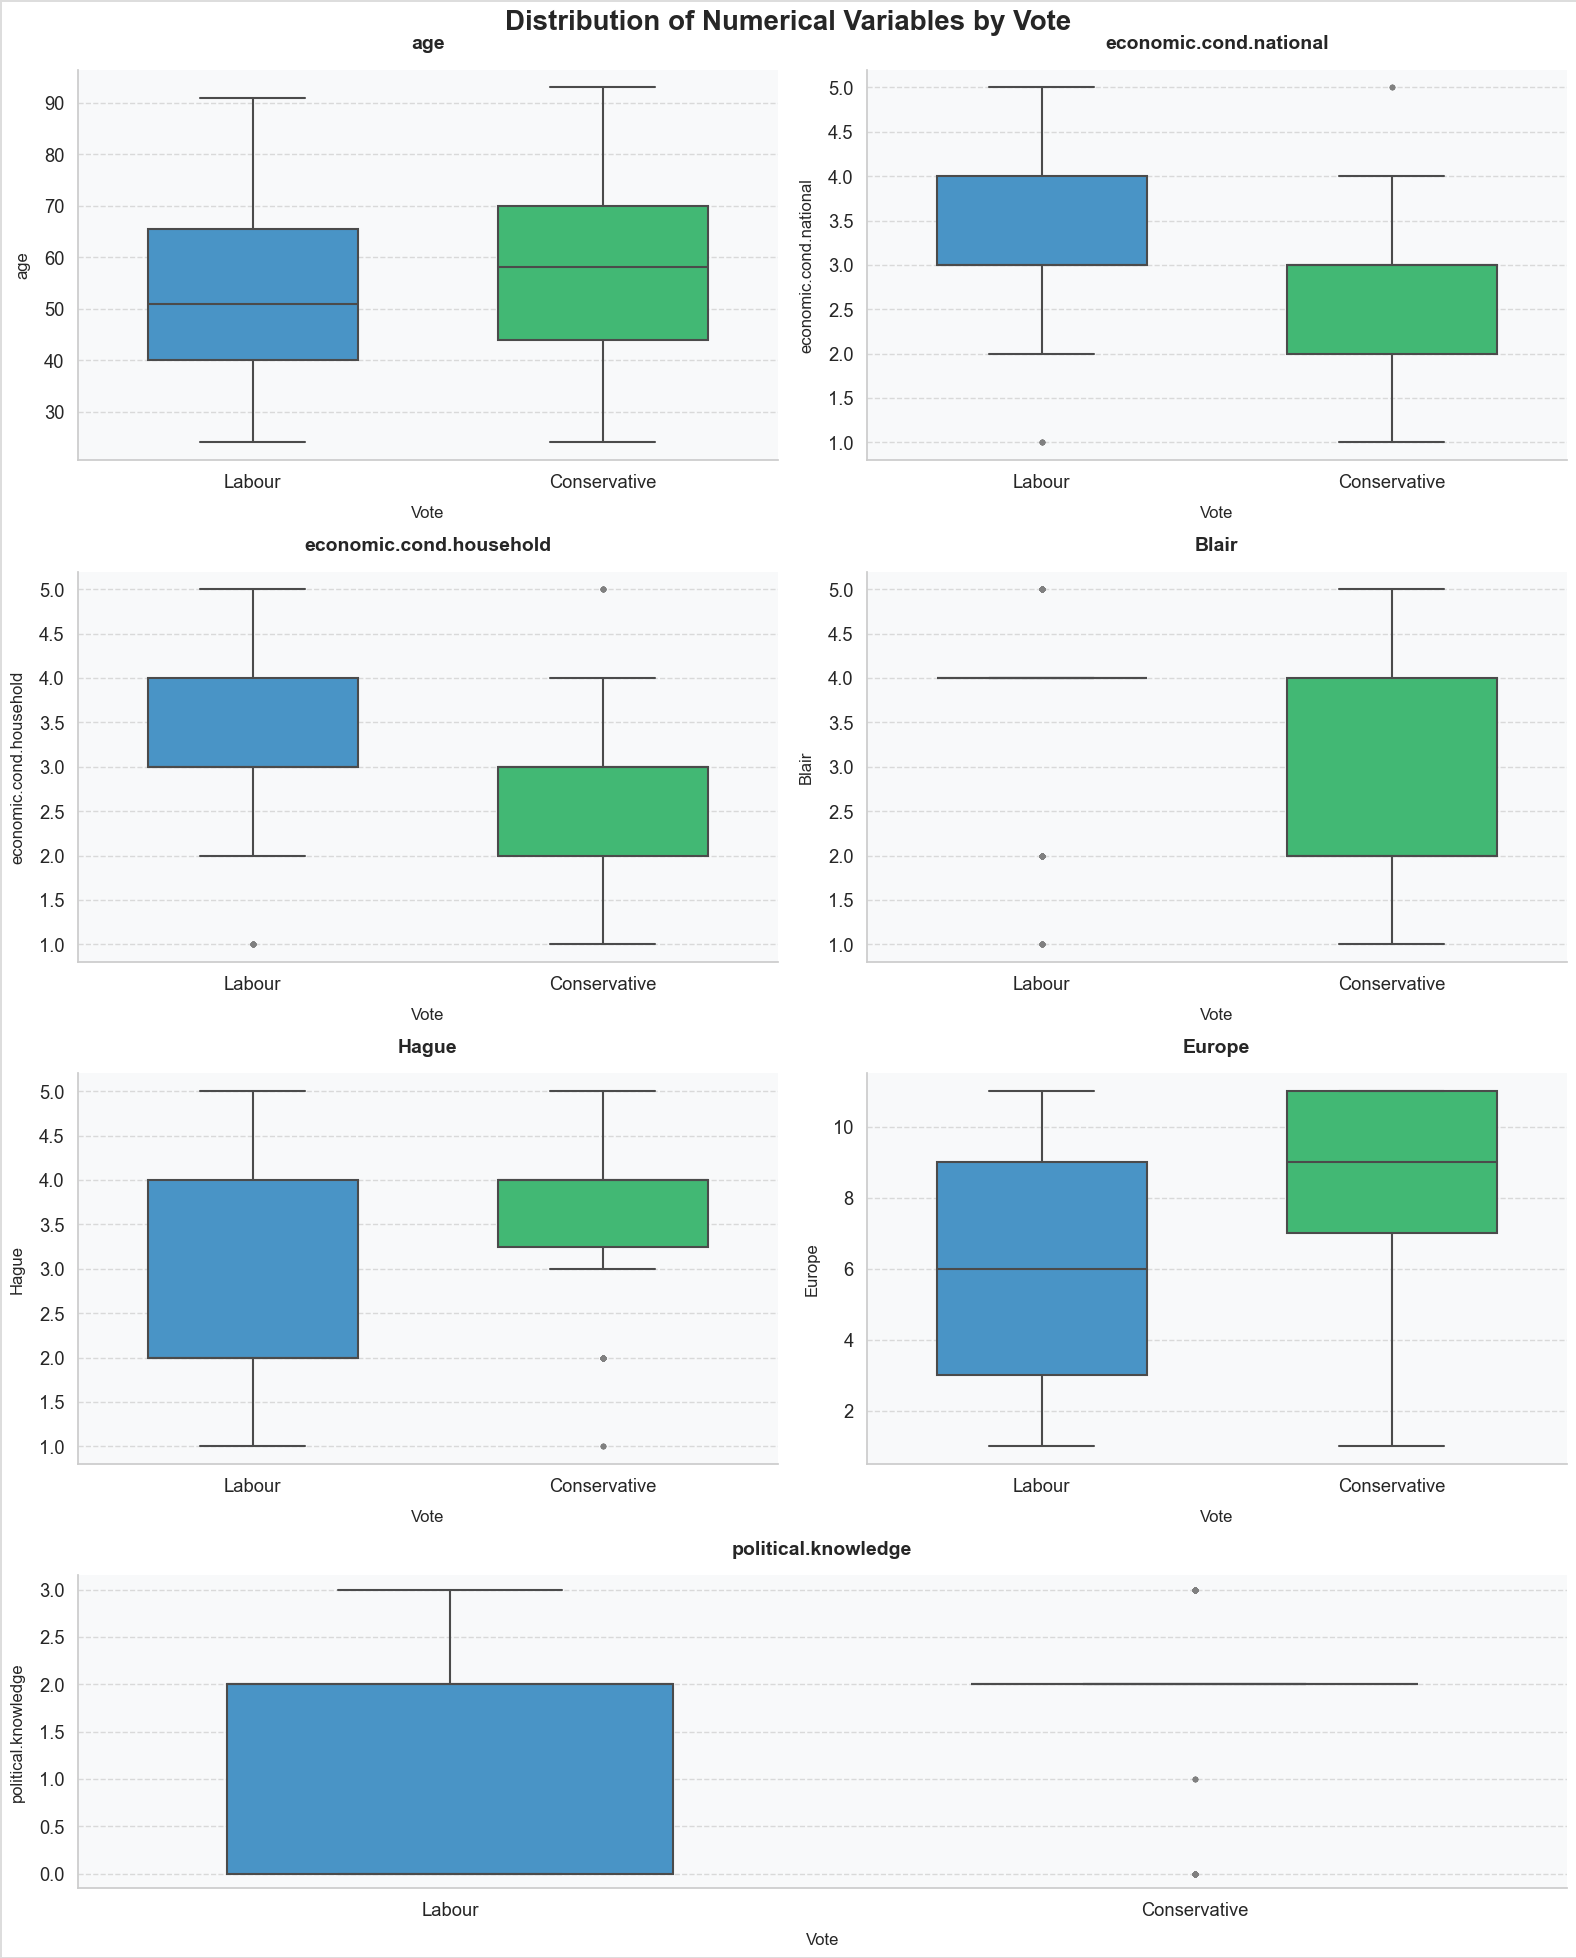

In [330]:
import matplotlib.gridspec as gridspec



fig = plt.figure(figsize=(16, 20))
gs = gridspec.GridSpec(4, 2, figure=fig, height_ratios=[1, 1, 1, 0.8])

palette = ["#3498db", "#2ecc71", "#9b59b6", "#e74c3c", "#f39c12"]

# Function to create a styled boxplot
def create_styled_boxplot(x, y, ax, title):
    sns.boxplot(
        x=x, 
        y=y, 
        ax=ax,
        palette=palette,
        width=0.6,
        linewidth=1.5,
        fliersize=4,
        flierprops={'marker': 'o', 'markerfacecolor': 'gray', 'markeredgecolor': 'none', 'alpha': 0.5}
    )
    
    # Style the plot
    ax.set_title(title, fontsize=14, fontweight='bold', pad=15)
    ax.set_xlabel('Vote', fontsize=12, labelpad=10)
    ax.set_ylabel(title, fontsize=12, labelpad=10)
    
    # Remove top and right spines
    sns.despine(ax=ax)
    
    # Improve grid appearance
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)
    
    # Style background
    ax.set_facecolor('#f8f9fa')

# Create the first 6 boxplots (3 rows, 2 columns)
j = 0
for i in range(0, 6, 2):
    # Create boxplot in left column
    ax1 = fig.add_subplot(gs[j, 0])
    create_styled_boxplot(
        x=df['vote'], 
        y=df[numerical_cols[i]], 
        ax=ax1, 
        title=numerical_cols[i]
    )
    
    # Create boxplot in right column
    ax2 = fig.add_subplot(gs[j, 1])
    create_styled_boxplot(
        x=df['vote'], 
        y=df[numerical_cols[i + 1]], 
        ax=ax2, 
        title=numerical_cols[i + 1]
    )
    
    j += 1

# Create the 7th boxplot centered in the bottom row
ax7 = fig.add_subplot(gs[3, :])
create_styled_boxplot(
    x=df['vote'], 
    y=df[numerical_cols[-1]], 
    ax=ax7, 
    title=numerical_cols[-1]
)

# Add a main title
fig.suptitle('Distribution of Numerical Variables by Vote', 
             fontsize=20, fontweight='bold', y=0.98)

# Add subtle figure border
fig.patch.set_linewidth(1)
fig.patch.set_edgecolor('#dddddd')
fig.patch.set_facecolor('#ffffff')

# Adjust spacing
plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.3)

# Show the plot
plt.show()

- We can see there are outliers. But let's see first and we'll treat them before making linear model

In [331]:

outlier_cols = ["economic.cond.national", "economic.cond.household"]

In [332]:
def get_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Find outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

In [333]:
for i in outlier_cols:
    display(get_outliers(i))

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
39,Conservative,72,1,3,2,2,11,2,female
42,Labour,66,1,1,4,2,8,0,female
57,Labour,32,1,2,1,4,1,2,male
91,Conservative,49,1,1,2,4,8,3,female
105,Labour,60,1,3,1,4,8,0,female
109,Labour,31,1,1,2,4,11,0,male
159,Labour,67,1,3,2,4,11,0,female
165,Conservative,53,1,3,1,4,6,2,male
215,Conservative,34,1,1,1,4,11,3,male
291,Conservative,60,1,2,2,5,11,2,female


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
19,Labour,37,3,1,1,1,5,2,female
21,Labour,53,2,1,2,4,5,2,male
35,Labour,41,3,1,4,4,6,3,female
42,Labour,66,1,1,4,2,8,0,female
62,Labour,28,4,1,4,2,6,2,female
...,...,...,...,...,...,...,...,...,...
1469,Conservative,70,1,1,2,5,11,2,male
1480,Labour,55,2,1,4,4,7,2,female
1493,Labour,34,3,1,4,2,6,2,female
1501,Conservative,44,3,1,4,2,9,3,female


- Let's treat outliers 


In [334]:
def treat_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Removing outlier only if there are error
    # df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    # Outlier treatment
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])


In [335]:
for col in outlier_cols:
    treat_outliers(df, col)

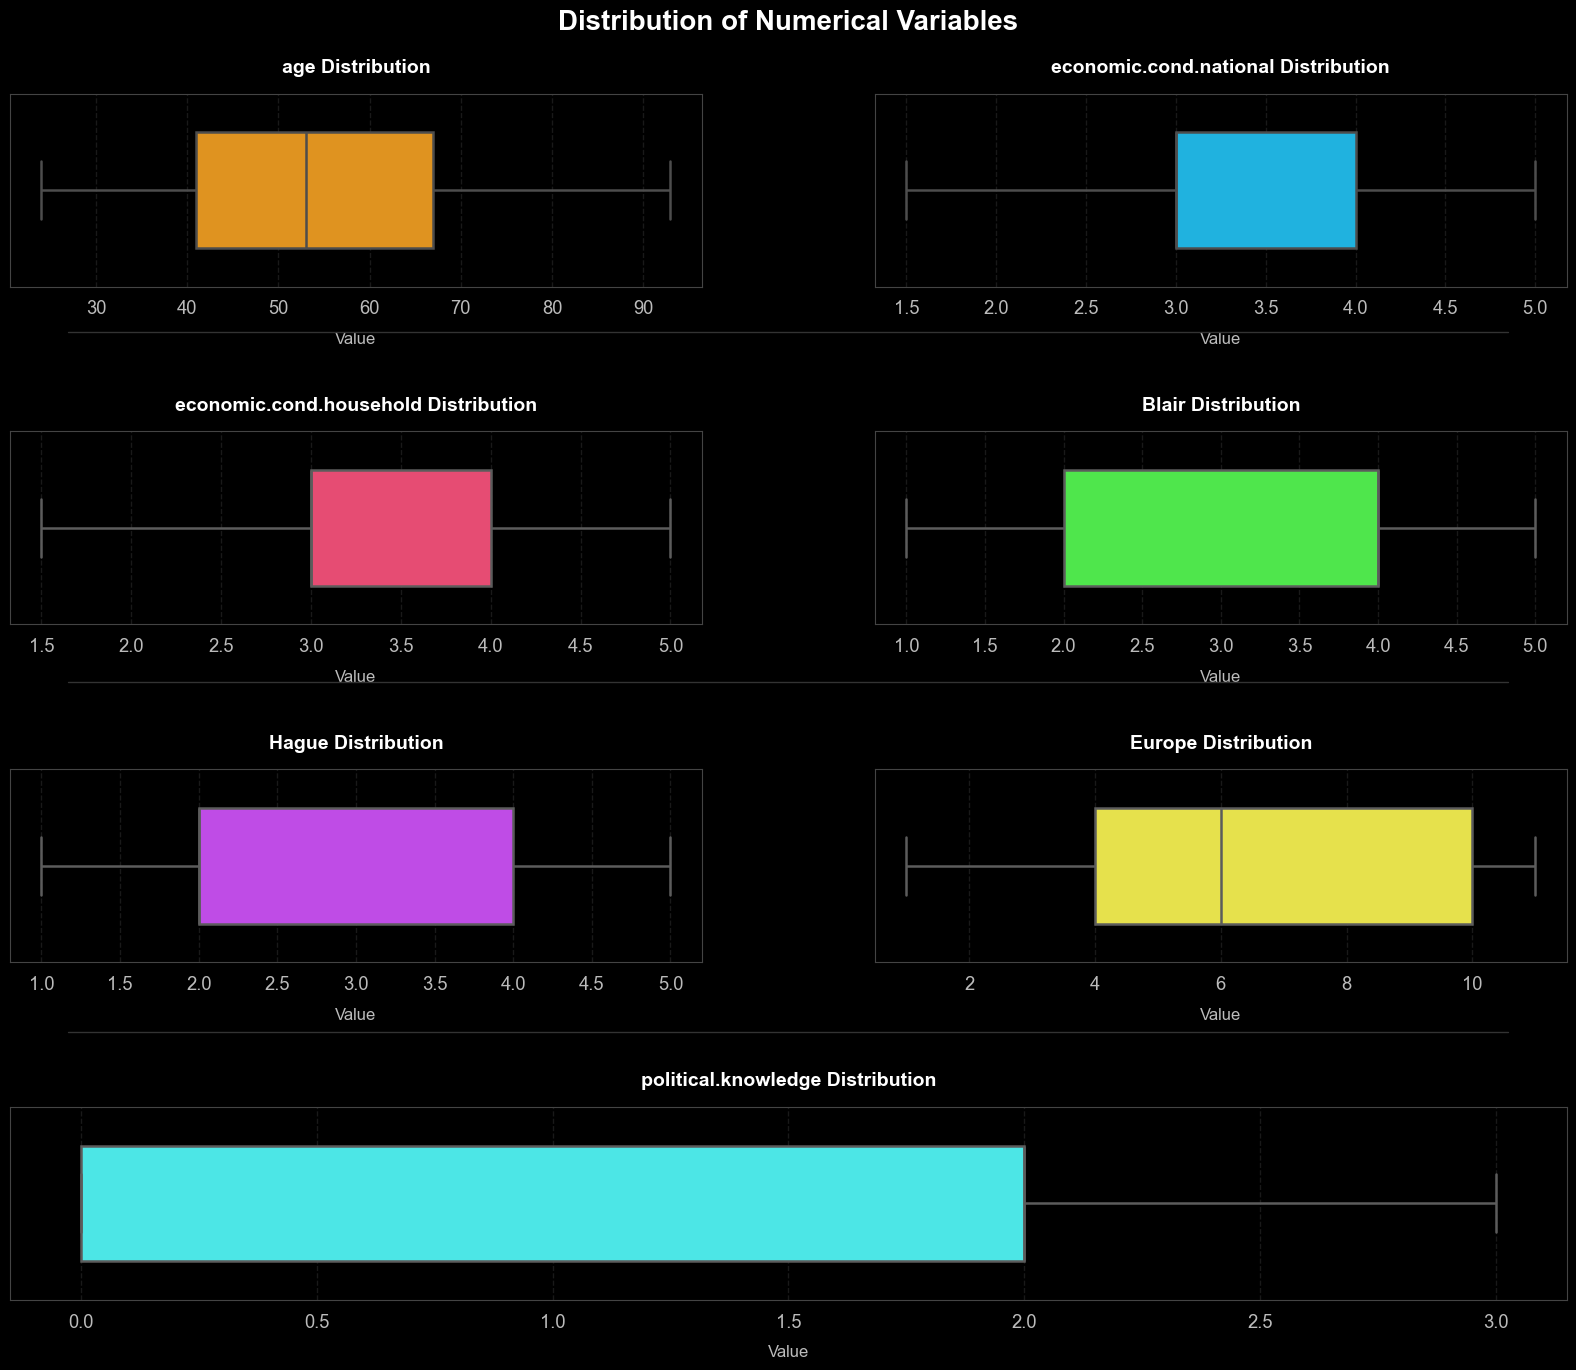

In [336]:


# Set the style
plt.style.use("dark_background")

# Create a color palette that works well with dark background
colors = ["#ff9a00", "#00c3ff", "#ff3366", "#36ff33", "#cc33ff", "#fff933", "#33ffff"]

# Create a figure with custom layout
fig = plt.figure(figsize=(16, 14))

# Use GridSpec for more control over layout
gs = gridspec.GridSpec(4, 2, figure=fig)

# Safely handle the 7 numerical columns
num_cols = len(numerical_cols)
col_index = 0

# Create a function to style each plot consistently
def style_boxplot(ax, data, title, color):
    # Create boxplot with custom styling
    sns.boxplot(
        x=data, 
        ax=ax, 
        orient='h',
        color=color,
        width=0.6,
        linewidth=1.8,
        fliersize=5,
        flierprops={'marker': 'o', 'markerfacecolor': color, 'markeredgecolor': '#ffffff', 'alpha': 0.7}
    )
    
    # Style the plot
    ax.set_title(f"{title} Distribution", fontsize=14, fontweight='bold', pad=15)
    ax.set_xlabel("Value", fontsize=12, labelpad=10)
    
    # Add a subtle grid
    ax.grid(axis='x', linestyle='--', alpha=0.3, color='#555555')
    ax.set_axisbelow(True)
    
    # Add a thin box around the plot
    for spine in ax.spines.values():
        spine.set_edgecolor('#444444')
        spine.set_linewidth(0.8)
    
    # Style the text elements
    ax.tick_params(axis='x', colors='#bbbbbb')
    ax.tick_params(axis='y', colors='#bbbbbb')
    ax.title.set_color('#ffffff')
    ax.xaxis.label.set_color('#bbbbbb')

# Loop through the first 3 rows (6 plots if available)
for row in range(3):
    # Left plot
    if col_index < num_cols:
        ax_left = fig.add_subplot(gs[row, 0])
        style_boxplot(ax_left, df[numerical_cols[col_index]], numerical_cols[col_index], colors[col_index % len(colors)])
        col_index += 1
    
    # Right plot
    if col_index < num_cols:
        ax_right = fig.add_subplot(gs[row, 1])
        style_boxplot(ax_right, df[numerical_cols[col_index]], numerical_cols[col_index], colors[col_index % len(colors)])
        col_index += 1

# Special handling for the 7th plot (if it exists) - center it in bottom row
if col_index < num_cols:
    ax_bottom = fig.add_subplot(gs[3, :])
    style_boxplot(ax_bottom, df[numerical_cols[col_index]], numerical_cols[col_index], colors[col_index % len(colors)])

# Add an elegant title to the entire figure
fig.suptitle('Distribution of Numerical Variables', 
             fontsize=20, fontweight='bold', y=0.98, color='#ffffff')

# Add subtle dividing lines between rows
for row in range(1, 4):
    y_position = 1.0 - (row * 0.25)
    line = plt.Line2D([0.05, 0.95], [y_position, y_position], 
                     transform=fig.transFigure, figure=fig,
                     color='#333333', linestyle='-', linewidth=1)
    fig.add_artist(line)

# Adjust spacing
plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.75, wspace=0.25)

# Show the plot
plt.show()

In [337]:
for i in outlier_cols:
    display(get_outliers(i))

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


<hr>

# Feature Engineering

- Now we need to replace the `male` and `female` values of gender to numerical values and same with the votes column.

In [338]:
df_original = df.copy()

In [339]:
# We'll need something called LableEncoder
from sklearn.preprocessing import LabelEncoder

encoder_gender = LabelEncoder()
df["gender"] = encoder_gender.fit_transform(df["gender"])
encoder_gender.classes_, df["gender"].unique()

(array(['female', 'male'], dtype=object), array([0, 1]))

In [340]:
encoder_votes = LabelEncoder()
df["vote"] = encoder_votes.fit_transform(df["vote"])
encoder_votes.classes_, df["vote"].unique()

(array(['Conservative', 'Labour'], dtype=object), array([1, 0]))